In [209]:
import gurobipy as gp
from gurobipy import GRB

# Number of variables
n = 10  # You can set this to the desired number of variables

# Create a new model
model = gp.Model("max_sum_with_quadratic_constraint")

# Add variables
x = model.addVars(n, lb=0.0, name="x")

# Set objective: maximize sum of x_i
model.setObjective(gp.quicksum(x[i] for i in range(n)), GRB.MAXIMIZE)

# Add quadratic constraint: sum of squares of x_i <= 1
model.addQConstr(gp.quicksum(x[i] * x[i] for i in range(n)) <= 1, name="quad_constraint")

# Optimize model
model.optimize()

# Display the results
if model.status == GRB.OPTIMAL:
    print(f"Optimal objective value: {model.ObjVal}")
    for v in model.getVars():
        print(f"{v.varName} = {v.x}")
else:
    print("No optimal solution found")


Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.0.0 24A348)

CPU model: Apple M2 Max
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 0 rows, 10 columns and 0 nonzeros
Model fingerprint: 0xb90b9be8
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
  QRHS range       [1e+00, 1e+00]
Presolve time: 0.00s
Presolved: 11 rows, 11 columns, 11 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.500e+01
 Factor NZ  : 6.600e+01
 Factor Ops : 5.060e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -0.00000000e+00 -0.00000000e+00  0.00e+00 3.54e+0

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.0.0 24A348)

CPU model: Apple M2 Max
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 101 rows, 10100 columns and 19900 nonzeros
Model fingerprint: 0x717ea995
Model has 101 quadratic constraints
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-01, 1e+01]
  QRHS range       [1e+00, 1e+00]
Presolve time: 0.01s
Presolved: 502 rows, 10401 columns, 30501 nonzeros
Presolved model has 101 second-order cone constraints
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.060e+04
 Factor NZ  : 5.090e+04 (roughly 5 MB of memory)
 Factor Ops : 7.466e+06 (less than 1 second per iteration)
 Threads    : 12

                  Objective                Residual
Iter       Primal          Dual         Primal 

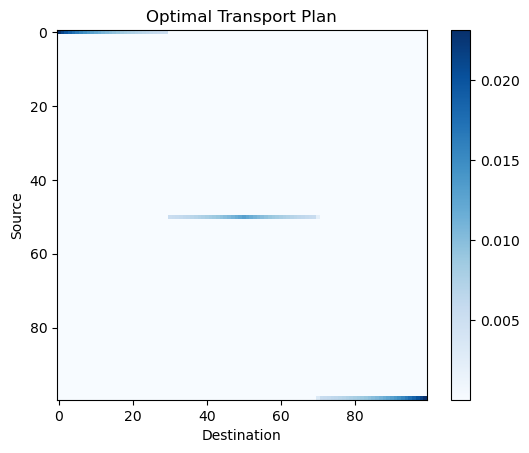

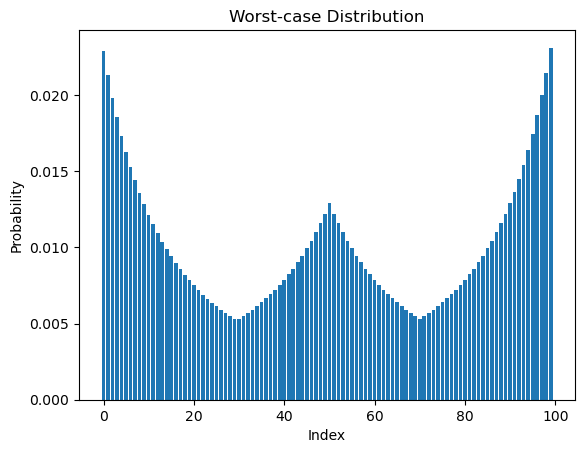

In [210]:
import gurobipy as gp
import numpy as np
from gurobipy import GRB


# Number of variables
n = 100  # You can set this to the desired number of variables

# Marginal nominal distribution
p = np.zeros(n,)
p[0] = 1/3
p[n // 2] = 1/3
p[n - 1] = 1/3

cost = [[np.abs(i - j) for j in range(n)] for i in range(n)]
radius = 10

# Create a new model
model = gp.Model("max_sum_with_quadratic_constraint")

# Add variables
x = model.addVars(n, lb=0.0, name="x")
y = model.addVars(n, n, lb=0.0, name='y')

# Set objective: maximize sum of x_i
model.setObjective(gp.quicksum(x[i] for i in range(n)), GRB.MAXIMIZE)

# Add quadratic constraint: sum of squares of x_i <= 1
model.addQConstr(gp.quicksum(x[i] * x[i] for i in range(n)) <= 1, name="quad_constraint")
model.addConstrs((gp.quicksum(y[i, j] for j in range(n)) == p[i] for i in range(n)), name='y_sum')
for j in range(n):
    model.addQConstr((gp.quicksum(y[i, j] for i in range(n)) >= x[j] * x[j]), name='y_sumj')

model.addConstr(gp.quicksum(cost[i][j] * y[i, j] for i in range(n) for j in range(n)) <= radius, name='wasserstein')
# Optimize model
model.optimize()

# Display the results
if model.status == GRB.OPTIMAL:
    print(f"Optimal objective value: {model.ObjVal}")
    for v in model.getVars():
        print(f"{v.varName} = {v.x}")
else:
    print("No optimal solution found")



# Visualize the optimal transport plan

import matplotlib.pyplot as plt

# Extract the optimal transport plan
optimal_plan = np.array([[y[i, j].x for j in range(n)] for i in range(n)])

# Plot the optimal transport plan
plt.imshow(optimal_plan, cmap="Blues")
plt.colorbar()
plt.xlabel("Destination")
plt.ylabel("Source")
plt.title("Optimal Transport Plan")
plt.show()


# Visualize the worst-case distribution

# Extract the worst-case distribution
worst_case_distribution0 = np.array([x[i].x ** 2 for i in range(n)])

# Plot the worst-case distribution
plt.bar(range(n), worst_case_distribution0)
plt.xlabel("Index")
plt.ylabel("Probability")
plt.title("Worst-case Distribution")
plt.show()


Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.0.0 24A348)

CPU model: Apple M2 Max
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 202 rows, 10200 columns and 30100 nonzeros
Model fingerprint: 0x630b905d
Model has 100 quadratic constraints
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [3e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-01, 1e+01]
Presolve removed 0 rows and 100 columns
Presolve time: 0.01s
Presolved: 202 rows, 10100 columns, 30100 nonzeros
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.030e+04
 Factor NZ  : 2.050e+04 (roughly 4 MB of memory)
 Factor Ops : 2.768e+06 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.80208411e+02 

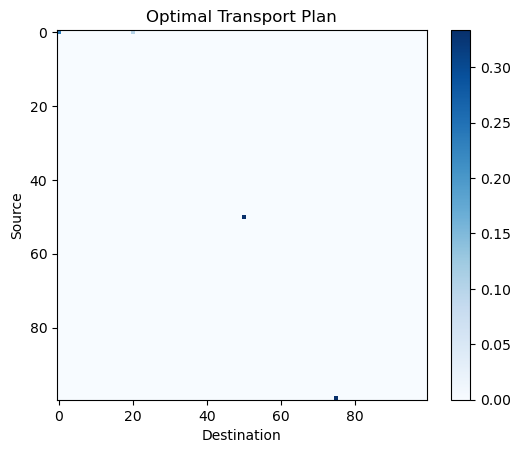

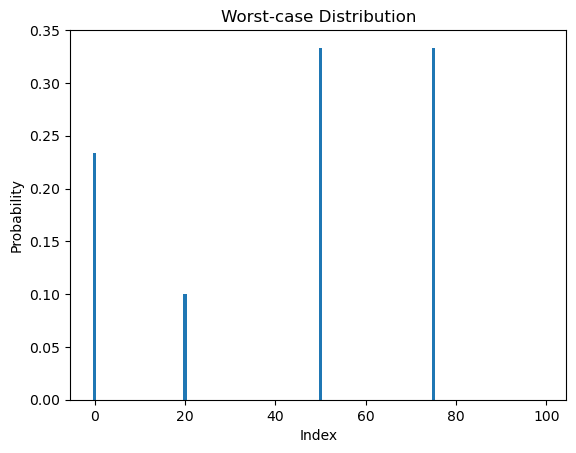

In [211]:
# gamma_weights is the weights proportional to normal distribution density
gamma_weights = (np.array([np.exp(-np.abs(i - 20)/30) for i in range(n)]) * 0.4 + np.array([np.exp(-np.abs(i - 75)/30) for i in range(n)]) * 0.6) * 100

# Create a new model
model = gp.Model("max_sum_with_only_linear_terms")
# Add variables
x = model.addVars(n, lb=0.0, name="x")
y = model.addVars(n, n, lb=0.0, name='y')
s = model.addVars(n, lb=0.0, name='s')

# Set objective: maximize sum of x_i
model.setObjective(gp.quicksum(gamma_weights[i] * s[i] for i in range(n)), GRB.MAXIMIZE)

# Add quadratic constraint: sum of squares of x_i <= 1
model.addQConstr(gp.quicksum(s[i] for i in range(n)) <= 1, name="quad_constraint")
model.addConstrs((s[i] >= x[i]**2 for i in range(n)), name='si_and_xi')
model.addConstrs((gp.quicksum(y[i, j] for j in range(n)) == p[i] for i in range(n)), name='y_sum')
for j in range(n):
    model.addQConstr((gp.quicksum(y[i, j] for i in range(n)) >= s[j]), name='y_sumj')

model.addConstr(gp.quicksum(cost[i][j] * y[i, j] for i in range(n) for j in range(n)) <= radius, name='wasserstein')
# Optimize model
model.optimize()

# Plot the optimal transport plan with values inside
optimal_plan = np.array([[y[i, j].x for j in range(n)] for i in range(n)])

plt.imshow(optimal_plan, cmap="Blues", data=True)
plt.colorbar()
plt.xlabel("Destination")
plt.ylabel("Source")
plt.title("Optimal Transport Plan")
plt.show()

worst_case_distribution1 = np.array([s[i].x for i in range(n)])

# Plot the worst-case distribution
plt.bar(range(n), worst_case_distribution1)
plt.xlabel("Index")
plt.ylabel("Probability")
plt.title("Worst-case Distribution")
plt.show()

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.0.0 24A348)

CPU model: Apple M2 Max
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 202 rows, 10200 columns and 30100 nonzeros
Model fingerprint: 0x077f12f6
Model has 100 quadratic constraints
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [1e+00, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-01, 1e+01]
Presolve time: 0.01s
Presolved: 502 rows, 10400 columns, 30600 nonzeros
Presolved model has 100 second-order cone constraints
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.080e+04
 Factor NZ  : 2.170e+04 (roughly 5 MB of memory)
 Factor Ops : 2.773e+06 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4

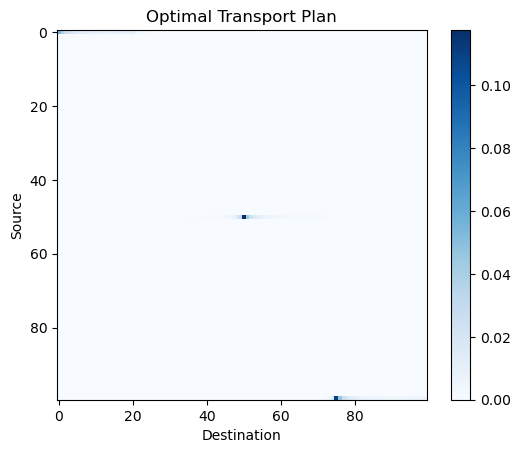

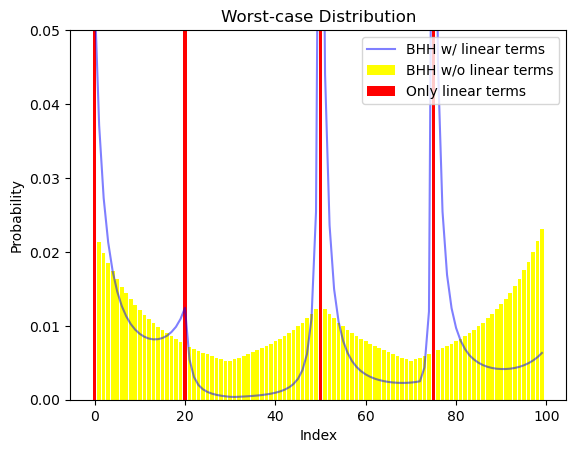

In [212]:
# Create a new model
model = gp.Model("max_sum_with_sqrt_x_plus_linear_terms")

# Add variables
x = model.addVars(n, lb=0.0, name="x")
y = model.addVars(n, n, lb=0.0, name='y')
s = model.addVars(n, lb=0.0, name='s')

# Set objective: maximize sum of x_i
model.setObjective(gp.quicksum(x[i] + gamma_weights[i] * s[i] for i in range(n)), GRB.MAXIMIZE)

# Add quadratic constraint: sum of squares of x_i <= 1
model.addQConstr(gp.quicksum(s[i] for i in range(n)) <= 1, name="quad_constraint")
model.addConstrs((s[i] >= x[i]**2 for i in range(n)), name='si_and_xi')
model.addConstrs((gp.quicksum(y[i, j] for j in range(n)) == p[i] for i in range(n)), name='y_sum')
for j in range(n):
    model.addQConstr((gp.quicksum(y[i, j] for i in range(n)) >= s[j]), name='y_sumj')

model.addConstr(gp.quicksum(cost[i][j] * y[i, j] for i in range(n) for j in range(n)) <= radius, name='wasserstein')
# Optimize model
model.optimize()

# Display the results
if model.status == GRB.OPTIMAL:
    print(f"Optimal objective value: {model.ObjVal}")
    for v in model.getVars():
        print(f"{v.varName} = {v.x}")
else:
    print("No optimal solution found")



# Visualize the optimal transport plan

import matplotlib.pyplot as plt

# Extract the optimal transport plan
optimal_plan = np.array([[y[i, j].x for j in range(n)] for i in range(n)])

# Plot the optimal transport plan
plt.imshow(optimal_plan, cmap="Blues")
plt.colorbar()
plt.xlabel("Destination")
plt.ylabel("Source")
plt.title("Optimal Transport Plan")
plt.show()


# Visualize the worst-case distribution

# Extract the worst-case distribution
worst_case_distribution2 = np.array([s[i].x for i in range(n)])

# Plot the worst-case distribution
plt.bar(range(n), worst_case_distribution0, label='BHH w/o linear terms', color='yellow')
plt.bar(range(n), worst_case_distribution1, label='Only linear terms', color='red')
plt.plot(range(n), worst_case_distribution2, label='BHH w/ linear terms', color='blue', alpha=0.5)
plt.xlabel("Index")
plt.ylabel("Probability")
plt.ylim(0, 0.05)
plt.title("Worst-case Distribution")
plt.legend()
plt.show()


# 2D problems

In [213]:
# 2-D support

# Number of variables
n = 20  # You can set this to the desired number of variables
n_sq = n * n

# Marginal nominal distribution
p = np.zeros(n_sq,)
p[n] = 1/3
p[n // 2 + n * (n // 2)] = 1/3
p[n - 1 + n * (n - 1)] = 1/3

cost = np.array([[np.linalg.norm(np.array([i // n, i % n]) - np.array([j // n, j % n])) for j in range(n_sq)] for i in range(n_sq)])
radius = 5

def gurobi_solves_primal(n, p, cost, radius):

    n_sq = n * n
    # Create a new model
    model = gp.Model("max_sum_with_quadratic_constraint")

    # Add variables
    x = model.addVars(n_sq, lb=0.0, name="x")
    y = model.addVars(n_sq, n_sq, lb=0.0, name='y')

    # Set objective: maximize sum of x_i
    model.setObjective(gp.quicksum(x[i] for i in range(n_sq)), GRB.MAXIMIZE)

    # Add quadratic constraint: sum of squares of x_i <= 1
    model.addQConstr(gp.quicksum(x[i] * x[i] for i in range(n_sq)) <= 1, name="quad_constraint")
    model.addConstrs((gp.quicksum(y[i, j] for j in range(n_sq)) == p[i] for i in range(n_sq)), name='y_sum')
    for j in range(n_sq):
        model.addQConstr((gp.quicksum(y[i, j] for i in range(n_sq)) >= x[j] * x[j]), name='y_sumj')

    model.addConstr(gp.quicksum(cost[i][j] * y[i, j] for i in range(n_sq) for j in range(n_sq)) <= radius, name='wasserstein')
    # Optimize model
    model.optimize()

    return model

optimized_primal = gurobi_solves_primal(n, p, cost, radius)
# Display the results
if optimized_primal.status == GRB.OPTIMAL:
    print(f"Optimal objective value: {optimized_primal.ObjVal}")
    # for v in model.getVars():
    #     print(f"{v.varName} = {v.x}")
else:
    print("No optimal solution found")



def visualize_worst_dist(n, y):
    
    n_sq = n * n
    
    # Visualize the optimal transport plan
    import matplotlib.pyplot as plt
    # Extract the optimal transport plan

    optimal_plan = np.array([[y[i, j].x for j in range(n_sq)] for i in range(n_sq)])

    # Plot the optimal transport plan
    plt.imshow(optimal_plan, cmap="Blues")
    plt.colorbar()
    plt.xlabel("Destination")
    plt.ylabel("Source")
    plt.title("Optimal Transport Plan")
    plt.show()

    
    # Visualize the worst-case distribution (2-D support)
    # Extract the worst-case distribution

    worst_case_distribution = np.array([[(x[i*n + j].x) ** 2 for j in range(n)] for i in range(n)])

    # Plot the worst-case distribution, scale from zero to one

    plt.imshow(worst_case_distribution, cmap="Blues")
    plt.colorbar()
    plt.xlabel("Column")
    plt.ylabel("Row")
    plt.title("Worst-case Distribution")
    plt.show()





Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.0.0 24A348)

CPU model: Apple M2 Max
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 401 rows, 160400 columns and 319600 nonzeros
Model fingerprint: 0x57ffc3b0
Model has 401 quadratic constraints
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-01, 5e+00]
  QRHS range       [1e+00, 1e+00]
Presolve time: 0.05s
Presolved: 2002 rows, 161601 columns, 482001 nonzeros
Presolved model has 401 second-order cone constraints
Ordering time: 2.48s

Barrier statistics:
 Dense cols : 1
 AA' NZ     : 1.632e+05
 Factor NZ  : 3.268e+05 (roughly 70 MB of memory)
 Factor Ops : 1.723e+08 (less than 1 second per iteration)
 Threads    : 12

                  Objective                Residual
Iter       Primal        

# Dual problem of 2D SDP solved by Gurobi

In [207]:
import gurobipy as gp
from gurobipy import GRB

# Create a new model
SDP_dual = gp.Model("SDP_dual")

# Add variables
lambda_var = SDP_dual.addVar(name="lambda", vtype=GRB.CONTINUOUS, lb=0.0)
tau = SDP_dual.addVar(name="tau", vtype=GRB.CONTINUOUS, lb=0.0)
mu = SDP_dual.addVars(n_sq, name="mu", vtype=GRB.CONTINUOUS, lb=-GRB.INFINITY)
nu = SDP_dual.addVars(n_sq, name="nu", vtype=GRB.CONTINUOUS, lb=0.0)
rho = SDP_dual.addVars(n_sq, name="rho", vtype=GRB.CONTINUOUS, lb=-GRB.INFINITY)

# Add constraints
for i in range(n_sq):
    SDP_dual.addConstr(rho[i] * (tau + nu[i]) >= 1/4, name=f"SDP_constr_{i}")
    SDP_dual.addConstr(rho[i] >= 0, name=f"SDP_constr_{i}")
    SDP_dual.addConstr(tau + nu[i] >= 0, name=f"SDP_constr_{i}")
    for j in range(n_sq):
        SDP_dual.addConstr(lambda_var * cost[i][j] + mu[i] - nu[j] >= 0, name=f"linear_constr_{i}_{j}")
        
# Objective
SDP_dual.setObjective((gp.quicksum(rho[i] for i in range(n_sq)) + lambda_var * radius + gp.quicksum(mu[i] * p[i] for i in range(n_sq)) + tau), GRB.MINIMIZE)

# Optimize model
SDP_dual.setParam('NonConvex', 2)
SDP_dual.optimize()

# Display the results
if SDP_dual.status == GRB.OPTIMAL:
    print(f"Optimal objective value: {SDP_dual.ObjVal}")
    # for v in SDP_dual.getVars():
    #     print(f"{v.varName} = {v.x}")
else:
    print("No optimal solution found")
    

Set parameter NonConvex to value 2
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.0.0 24A348)

CPU model: Apple M2 Max
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 160800 rows, 1202 columns and 480800 nonzeros
Model fingerprint: 0xedfccb05
Model has 400 quadratic constraints
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [3e-01, 5e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
  QRHS range       [2e-01, 2e-01]
Presolve removed 159600 rows and 397 columns
Presolve time: 0.02s
Presolved: 2800 rows, 2405 columns, 7597 nonzeros
Presolved model has 400 second-order cone constraints
Ordering time: 0.00s

Barrier statistics:
 Dense cols : 5
 AA' NZ     : 7.197e+03
 Factor NZ  : 2.522e+04 (roughly 2 MB of memory)
 Factor Ops : 2.381e+05 (less than 1 second per iteration)
 Threads    : 1

                  Objective         

# Dual problem of 2D SDP solved by COPT

In [214]:
import coptpy as cp
from coptpy import COPT


def copt_solves_dual(n, p, cost, radius):

    # Create COPT environment
    env = cp.Envr()

    # Create COPT model
    m = env.createModel("sdp_dual")

    A = m.addSparseMat(2, rows=[0], cols=[1], vals=[1.0])
    B = m.addSparseMat(2, [(0, 0, 1.0)])
    C = m.addSparseMat(2, [(1, 1, 1.0)])

    # Add variables
    lambda_var = m.addVar(lb=0.0, ub=COPT.INFINITY ,name="lambda")
    tau = m.addVar(lb=0.0, ub=COPT.INFINITY, name="tau")
    mu = m.addVars(n_sq, lb=-COPT.INFINITY, ub=COPT.INFINITY, nameprefix="mu")
    nu = m.addVars(n_sq, lb=0.0, ub=COPT.INFINITY, nameprefix="nu")
    rho = m.addVars(n_sq, lb=0.0, ub=COPT.INFINITY, nameprefix="rho")
    X_bars = m.addPsdVars([2 for _ in range(n_sq)], nameprefix="X_bar")

    # Add constraints
    for i in range(n_sq):
        m.addConstr(A * X_bars[i] == 1)
        m.addConstr(B * X_bars[i] == rho[i])
        m.addConstr(C * X_bars[i] == (tau + nu[i]))

        for j in range(n_sq):
            m.addConstr(lambda_var * cost[i][j] + mu[i] - nu[j] >= 0, name=f"linear_constr_{i}_{j}")

    # Set objective
    m.setObjective((lambda_var * radius + tau + cp.quicksum(rho) + cp.quicksum([mu[i] * p[i] for i in range(n_sq)])), sense=COPT.MINIMIZE)

    # Optimize model
    m.solve()

    return m


optimized_dual = copt_solves_dual(n, p, cost, radius)
if optimized_dual.status == COPT.OPTIMAL:
    print(f"Optimal objective value: {optimized_dual.ObjVal}")
    # for v in optimized_dual.getVars():
    #     print(f"{v.getName()} = {v.x}")

Cardinal Optimizer v7.1.7. Build date Sep 24 2024
Copyright Cardinal Operations 2024. All Rights Reserved

Model fingerprint: 70815106

Using Cardinal Optimizer v7.1.7 on macOS (aarch64)
Hardware has 12 cores and 12 threads. Using instruction set ARMV8 (30)
Minimizing an SDP problem

The original problem has:
    160000 rows, 1202 columns and 479600 non-zero elements
    400 PSD columns
    1200 PSD constraints

Using Primal-Dual Method

Starting barrier solver using 12 threads

Problem info:
Range of matrix coefficients:    [6e-02,1e+00]
Range of rhs coefficients:       [1e+00,1e+00]
Range of bound coefficients:     [0e+00,0e+00]
Range of cost coefficients:      [2e-02,6e-02]

Factor info:
Number of dense columns:         803
Number of matrix entries:        6.440e+05
Number of factor entries:        2.646e+06
Number of factor flops:          2.681e+09

Iter       Primal.Obj         Dual.Obj      Compl  Primal.Inf  Dual.Inf    Time
   0  +0.00000000e+00  +0.00000000e+00   1.62e+05    

================START 5==================

Gurobi solving primal for n = 5
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 23.2.0 23C64)

CPU model: Apple M2 Max
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 26 rows, 650 columns and 1225 nonzeros
Model fingerprint: 0x97cb9cb2
Model has 26 quadratic constraints
Coefficient statistics:
  Matrix range     [1e+00, 6e+00]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-01, 5e+00]
  QRHS range       [1e+00, 1e+00]
Presolve time: 0.00s
Presolved: 127 rows, 726 columns, 2001 nonzeros
Presolved model has 26 second-order cone constraints
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.025e+03
 Factor NZ  : 4.052e+03
 Factor Ops : 1.467e+05 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter    

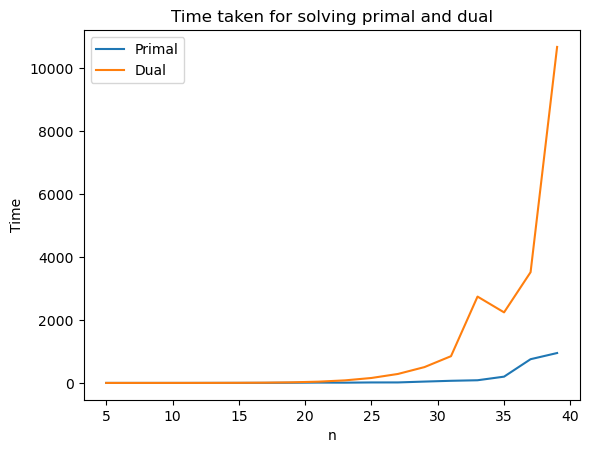

In [7]:
import time

primal_time, dual_time = {}, {}

for n in range(5, 40, 2):
    print(f"================START {n}==================\n")
    n_sq = n * n
    
    # Marginal nominal distribution
    p = np.zeros(n_sq,)
    p[n] = 1/3
    p[n // 2 + n * (n // 2)] = 1/3
    p[n - 1 + n * (n - 1)] = 1/3

    cost = np.array([[np.linalg.norm(np.array([i // n, i % n]) - np.array([j // n, j % n])) for j in range(n_sq)] for i in range(n_sq)])
    radius = 5

    start_time = time.time()
    print(f"Gurobi solving primal for n = {n}")
    optimized_primal = gurobi_solves_primal(n, p, cost, radius)
    print(f"Time taken for Gurobi primal: {time.time() - start_time}")
    primal_time[n] = time.time() - start_time

    if optimized_primal.status == GRB.OPTIMAL:
        print(f"Optimal objective value: {optimized_primal.ObjVal}")
    else:
        print("No optimal solution found")

    start_time = time.time()
    print(f"Gurobi solving dual for n = {n}")
    optimized_dual = copt_solves_dual(n, p, cost, radius)
    print(f"Time taken for COPT dual: {time.time() - start_time}")
    dual_time[n] = time.time() - start_time
    if optimized_dual.status == COPT.OPTIMAL:
        print(f"Optimal objective value: {optimized_dual.ObjVal}")
    else:
        print("No optimal solution found")
    print(f"================END {n}==================\n")


# plot the time taken for primal and dual
plt.plot(list(primal_time.keys()), list(primal_time.values()), label='Primal')
plt.plot(list(dual_time.keys()), list(dual_time.values()), label='Dual')
plt.xlabel('n')
plt.ylabel('Time')
plt.title('Time taken for solving primal and dual')
plt.legend()
plt.show()


Primal time: 1.1922362611020683 * n + -14.41140617633711


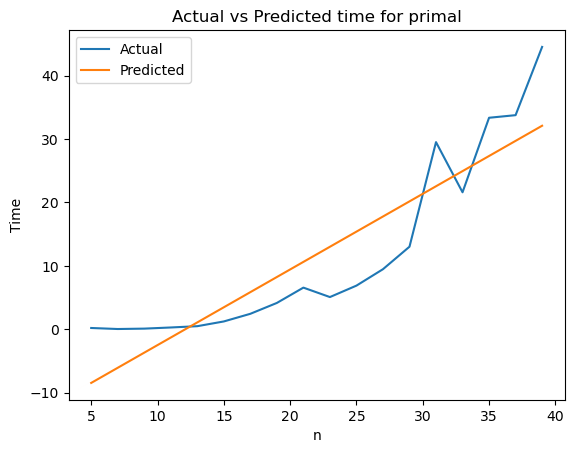

In [30]:
# Fit the primal time
from sklearn.linear_model import LinearRegression

X = np.array(list(primal_time.keys())).reshape(-1, 1)
y = np.array(list(primal_time.values())).reshape(-1, 1)

reg = LinearRegression().fit(X, y)
print(f"Primal time: {reg.coef_[0][0]} * n + {reg.intercept_[0]}")

# Plot the prediction and actual primal time
plt.plot(list(primal_time.keys()), list(primal_time.values()), label='Actual')
plt.plot(list(primal_time.keys()), reg.predict(X), label='Predicted')
plt.xlabel('n')
plt.ylabel('Time')
plt.title('Actual vs Predicted time for primal')
plt.legend()

Dual time: 0.06229049454491286 * exp(0.31369654334496194 * n) + -2.3215372037226674


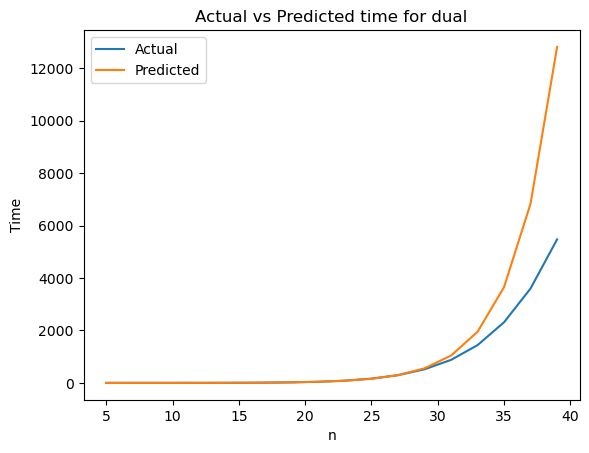

In [39]:
# Fit the dual time using exponential regression
from scipy.optimize import curve_fit

def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

X = np.array(list(dual_time.keys()))
y = np.array(list(dual_time.values()))

fitted_X = X[:12]
fitted_y = y[:12]

popt, _ = curve_fit(exponential_func, fitted_X, fitted_y)
print(f"Dual time: {popt[0]} * exp({popt[1]} * n) + {popt[2]}")

# Plot the prediction and actual dual time
plt.plot(list(dual_time.keys()), list(dual_time.values()), label='Actual')
plt.plot(list(dual_time.keys()), exponential_func(X, *popt), label='Predicted')
plt.xlabel('n')
plt.ylabel('Time')
plt.title('Actual vs Predicted time for dual')
plt.legend()

In [40]:
dual_time

{5: 0.13657903671264648,
 7: 0.07320284843444824,
 9: 0.130079984664917,
 11: 0.4062767028808594,
 13: 1.1453800201416016,
 15: 3.209228038787842,
 17: 8.107064008712769,
 19: 18.83030915260315,
 21: 40.685718059539795,
 23: 82.94169807434082,
 25: 160.53183794021606,
 27: 292.99775075912476,
 29: 517.534176826477,
 31: 875.8850340843201,
 33: 1437.963722229004,
 35: 2311.8065831661224,
 37: 3601.128242969513,
 39: 5472.197643041611}

In [38]:
dual_time_list = list(dual_time.values())
dual_time_ratio = [dual_time_list[i] / dual_time_list[i - 1] for i in range(1, len(dual_time_list))]
dual_time_ratio

[0.5359742622029348,
 1.7769798231471983,
 3.1232837544332335,
 2.819211665399097,
 2.8018893138987093,
 2.526172621804367,
 2.3227038953147487,
 2.1606505623363756,
 2.0385949180732976,
 1.9354780727581806,
 1.825169103640616,
 1.766341808036421,
 1.692419695748893,
 1.6417265580205969,
 1.6076946500309235,
 1.5577117347064593,
 1.5195786636382609]